<a href="https://colab.research.google.com/github/Fatima283/IA-2024/blob/main/perceptronflags.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

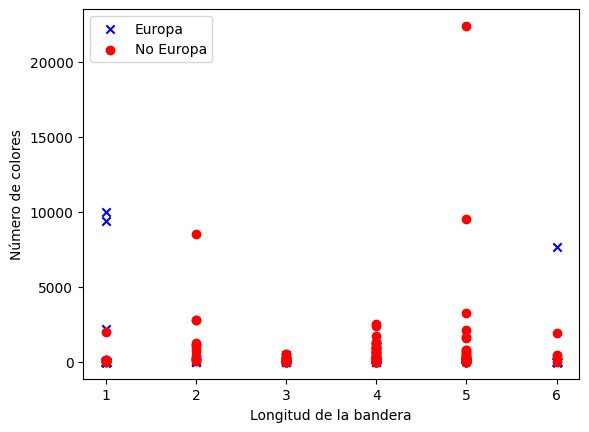

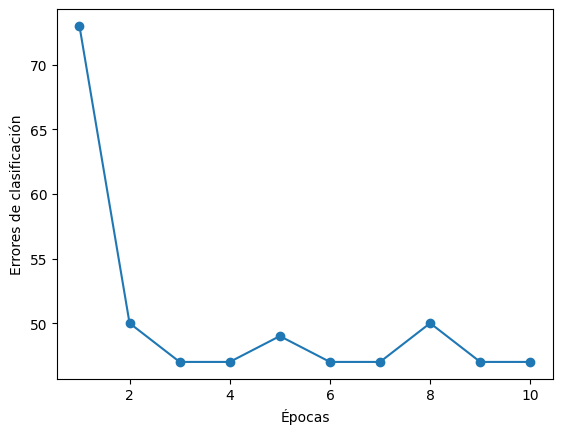

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)


# Cargar el dataset flag.data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data'
df = pd.read_csv(url, header=None)

# Seleccionar las características y las etiquetas
# Aquí seleccionamos dos características numéricas para simplificar. Por ejemplo, la longitud de la bandera (columna 1) y el número de colores (columna 3)
X = df.iloc[:, [1, 3]].values

# Seleccionar una etiqueta binaria para el perceptrón
# Aquí usamos si el país es de Europa (1) o no (0) como etiqueta (columna 6)
y = df.iloc[:, 6].values
y = np.where(y == 1, 1, -1)

# Visualizar los datos
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='x', label='Europa')
plt.scatter(X[y == -1, 0], X[y == -1, 1], color='red', marker='o', label='No Europa')
plt.xlabel('Longitud de la bandera')
plt.ylabel('Número de colores')
plt.legend(loc='upper left')
plt.show()

# Entrenar el perceptrón
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

# Graficar los errores de clasificación
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Errores de clasificación')
plt.show()
